In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy
import statsmodels.api as sm

In [2]:
data = pd.read_csv('data/house_prices/train.csv')

In [3]:
train_data = pd.DataFrame(data[['SalePrice', 'LotArea']]).reset_index()
del train_data['index']
train_data = train_data.rename(columns={'SalePrice': 'Y', 'LotArea': 'X'})

In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       1460 non-null   int64
 1   X       1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


In [40]:
train_data.sort_values(by="X", ascending=False).head()

,Y,X
313,375000,215245
335,228950,164660
249,277000,159000
706,302000,115149
451,280000,70761


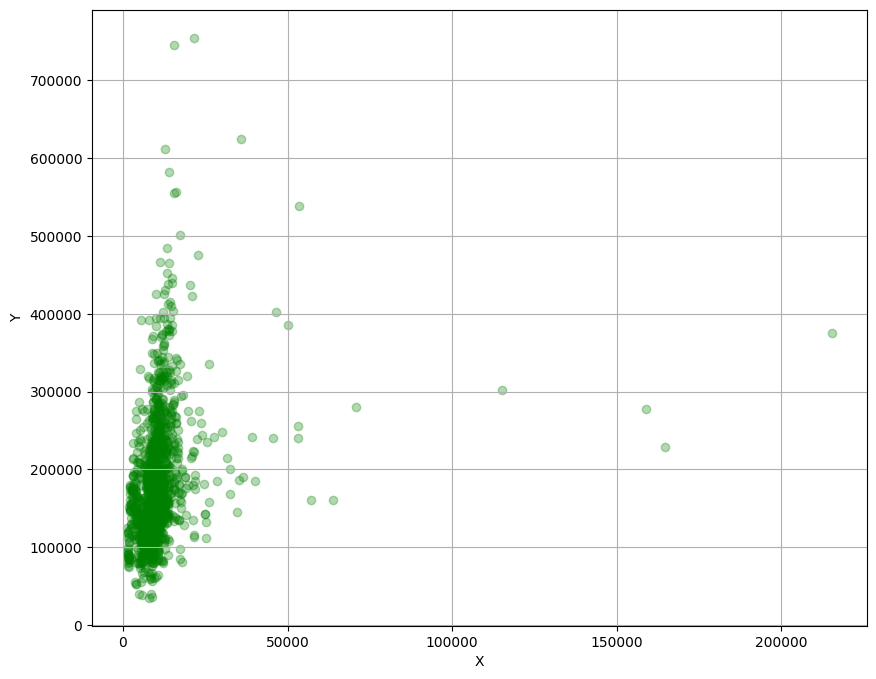

In [41]:
plt.figure(figsize=(10,8))

plt.scatter(train_data["X"], train_data["Y"], marker='o', alpha=0.3 , color = 'g', label=True)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.show()

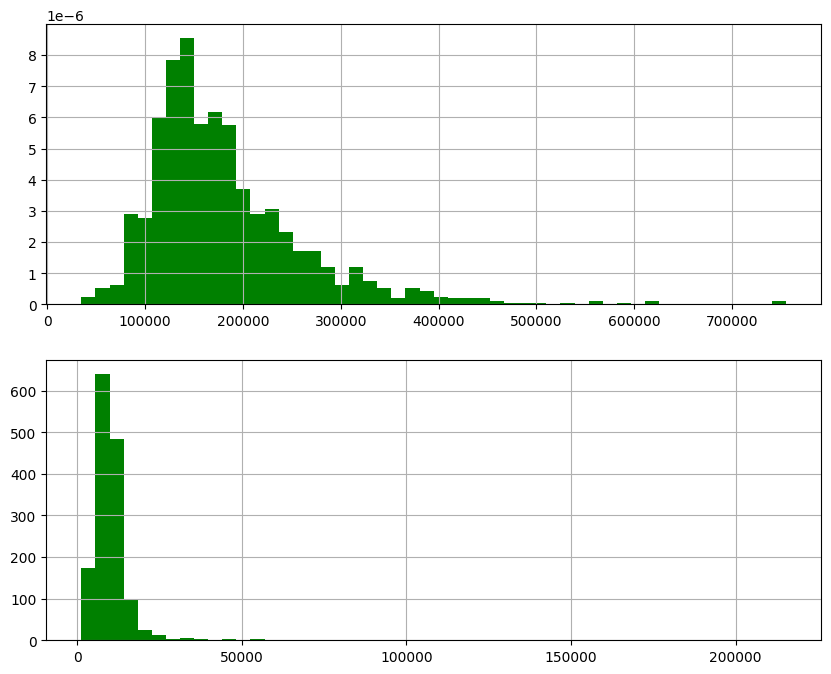

In [5]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)

n, bins, patches = plt.hist(train_data['Y'], 50, density=True, facecolor='g', label='X')
plt.grid(True)

plt.subplot(2,1,2)

n, bins, patches = plt.hist(train_data['X'], 50, density=False, facecolor='g', label='X')
plt.grid(True)
plt.show()

## Nhận xét:

Trên đồ thị, ta có thể thấy phân phối của cả giá nhà và diện tích đều lệch trái, tuy nhiên khoảng giá trị của diện tích lại phân bố rất hẹp nếu so với giá nhà, điều này thể hiện rằng có thể giá nhà còn phụ thuộc vào nhiều các yếu tố khác, vì cùng một diện tích, nhưng khoảng giá lại phân bố rất rộng. 

In [6]:
# Ước lượng mô hình hồi quy:
# Chuẩn bị dữ liệu
X = train_data['X'].values.reshape(-1,1)
y = train_data['Y'].values.reshape(-1,1)

### Hồi quy tuyến tính theo phương pháp OLS sử dụng thư viện sklearn

In [7]:
# Khởi tạo mô hình - Mô hình có hệ số chặn
reg = LinearRegression(fit_intercept = True)
# traning mô hình
reg.fit(X, y)
y_pred = reg.predict(X)
print(reg.intercept_)
print(reg.coef_)

[158836.15189688]
[[2.09997195]]


In [8]:
# Các chỉ số đánh giá mô hình
# - R2
# - R2 hiệu chỉnh. 
# Công thức: r2_adjusted = 1 - (1 - r2)(n-1)/(n-p-1)

# Gọi n là kích thước mẫu
# Gọi p là số biến độc lập có trong trong mô hình
# Ta có:
n = len(X)
p = 1
r2 = metrics.r2_score(y, y_pred)
r2_adjusted = 1 - (1 - r2)*(n-1)/(n-p-1)
print(r2)
print(r2_adjusted)

0.0696133153821118
0.06897519008401998


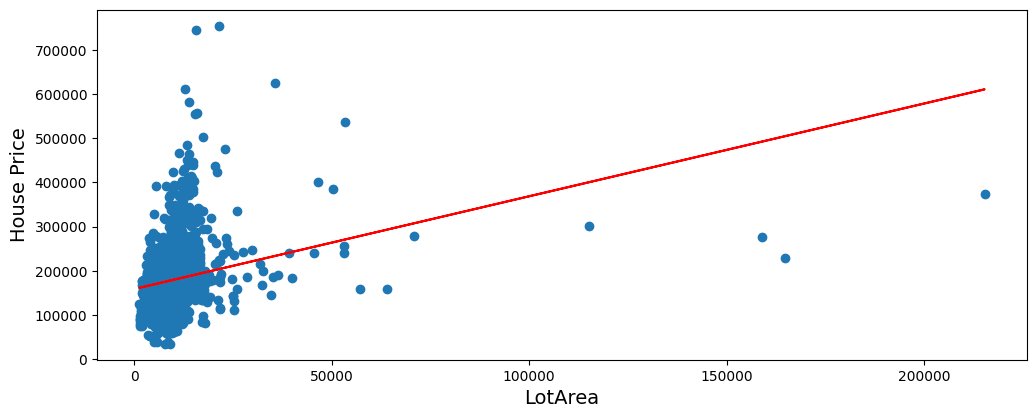

In [9]:
# visual OLS model
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(X, y_pred, color='r')
plt.scatter(X, y)
plt.ylabel('House Price', fontsize=14)
plt.xlabel('LotArea', fontsize=14)

plt.show()

In [10]:
# Khởi tạo mô hình - Mô hình không có hệ số chặn
reg = LinearRegression(fit_intercept = False)
# traning mô hình
reg.fit(X, y)
y_pred = reg.predict(X)
print(reg.intercept_)
print(reg.coef_)

0.0
[[10.04841063]]


In [11]:
# Các chỉ số đánh giá mô hình
# - R2
# - R2 hiệu chỉnh. 
# Công thức: r2_adjusted = 1 - (1 - r2)(n-1)/(n-p-1)

# Gọi n là kích thước mẫu
# Gọi p là số biến độc lập có trong trong mô hình
# Ta có:
n = len(X)
p = 1
r2 = metrics.r2_score(y, y_pred)
r2_adjusted = 1 - (1 - r2)*(n-1)/(n-p-1)
print(r2)
print(r2_adjusted)

-1.8253977045734544
-1.8273355630813923


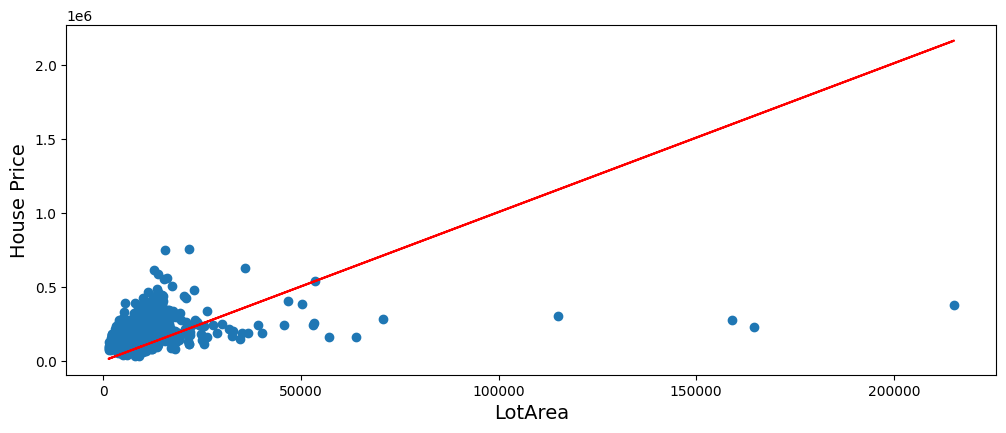

In [12]:
# visual OLS model
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(X, y_pred, color='r')
plt.scatter(X, y)
plt.ylabel('House Price', fontsize=14)
plt.xlabel('LotArea', fontsize=14)

plt.show()

### Hồi quy tuyến tính theo phương pháp OLS sử dụng thư viện statsmodels

In [13]:
# Ước lượng mô hình hồi quy:

X = train_data['X'].values.reshape(-1,1)
y = train_data['Y'].values.reshape(-1,1)

In [14]:
mod = sm.OLS(y, sm.add_constant(X))
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.12e-24
Time:                        22:13:42   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

In [15]:
mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              1737.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                   9.42e-251
Time:                        22:13:42   Log-Likelihood:                         -19302.
No. Observations:                1460   AIC:                                  3.861e+04
Df Residuals:                    1459   BIC:                                  3.861e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Đọc và diễn giải kết quả ước lượng.
**Lưu ý: Cả hai thư viện đều cho kết quả ước lượng là giống nhau, tuy nhiên do kết quả của thư viên statsmodel trực quan hơn nên ta sẽ sử dụng bảng kết quả này để trình bày**

## 1 Hồi quy tuyến tính theo phương pháp OLS có hệ số chặn.
### 1. Diễn giải kết quả ước lượng:

Hệ số chặn - intercept = 158836 có ý nghĩa là giá khởi điểm của một căn hộ có diện tích 0 m2 là 158836 $. Điều này là phi thực tế, tuy nhiên ta sẽ đối chiếu với kết quả mô hình hồi quy không có hệ số chặn sau.

Hệ số góc - beta1 = 2.1 có ý nghĩa là khi diện tích tăng lên 1 đơn vị, thì giá của căn hộ sẽ tăng lên tương ứng 2.1 đơn vị giá. Ví dụ, Với căn hộ có diện tích là 1 m2 thì theo kết quả ước lượng của mô hình có hệ số chặn, giá của căn hộ này sẽ là 158836 + 2.1 = 158838.1 $.

Sai số chuẩn của hệ số chặn _std err_ = 2914.7 và của hệ số góc = 0.201 thể hiện mức độ dao động của giá trị ước lượng tương ứng. Với hệ số chặn, _std err_ = 2914.7 có ý nghĩa là độ dao động khi ước lượng hệ số chặn là khoảng 2914.7 $, còn với hệ số góc, sai số gặp phải khi ước lượng là khoảng 0.2 đơn vị. Nếu so với giá trị ước lượng hệ số góc là 2.1 thì sai số này chiếm khoảng 10% giá trị ước lượng, môt con số có thể chấp nhận được.


### 2. Giải thích các chỉ số đánh giá:

R-squared: Chỉ số R bình phương = 0.070 có ý nghĩa là thay đổi của biến độc lập chỉ có thể giải thích được khoảng 7% sự biến đổi của biến phụ thuộc. Điều này cũng tương đối dễ hiểu vì trong thực tế, giá nhà được quyết định bởi nhiều yếu tố, không chỉ đơn giản là diện tích của căn nhà đó.

## So sánh kết quả ước lượng của mô hình có hệ số chặn và không có hệ số chặn
### 1. Kết quả ước lượng.

Mô hình có hệ số chặn cho phép ta ước lượng giá nhà theo mức độ gia tăng diện tích. Nhưng với mô hình không có hệ số chặn cho ta một cách nhìn khác.
Nếu lấy giá tiền của căn hộ chia cho diện tích và lấy bình quân, số nhận được cũng chính là mức giá trung bình của nhà đất theo cách hiểu của thị trường. Đây cũng chính là ý nghĩa hệ số ước lượng của mô hình không có hệ số chặn.

Theo cách giải thích trên ta suy ra một số logic sau:
+ Căn hộ có diện tích là 0 m2 thì có giá tiền = 0 (Hệ số chặn = 0)
+ Giá trung bình mỗi mét vuông đất = Hệ số góc ước lượng = 10.0484 ($/m2)

Sai số của ước lượng = 0.2 là rất nhỏ (chỉ chiểm 1%) kết quả ước lượng, như vậy có thể thấy việc ước lượng giá của một căn hộ thông qua giá trung bình này có mức độ chính xác tương đối cao.

### 2. Đánh giá mô hình

Kết quả tính toán R-squared ở mô hình không có hệ số chặn cho thấy cải thiện đáng kinh ngạc so với mô hình không có hệ số chặn. Theo đó, chúng ta đã có thể giải thích được đến 54.4% sự biến đổi của biến phụ thuộc theo biến độc lập là diện tích của lô đất. 

### 3. Kết luận

Bằng việc chuyển cách tính toán về logic thông thường, chúng ta đã cải thiện đáng kể khả năng ước lượng cho mô hình, vì vậy, tùy vào từng bài toán cụ thể, ta hoàn toàn có thể quyết định dạng của mô hình để gia tăng khả năng tính toán một cách nhanh chóng.

### R-squared (uncentered)

Trong kết quả ước lượng của thư viện statsmodels, ta gặp hệ số xác định R bình phương (uncentered), lý do sử dụng nó ở đây là để đặc trưng cho mô hình không có hệ số góc. Cách tính toán của 2 chỉ số này là khác nhau để tránh ảnh hưởng của việc bị khuyết đi hệ số chặn ở mô hình hồi quy không có hệ số chặn.

Chi tiết công thức có thể xem ở [link](https://help.fsight.ru/en/mergedProjects/lib/05_statistics/uimodellind_determcoeff_r2.htm) sau.